In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_1 = pd.read_csv('Data/Fifa_22_players_ratings.csv')
df_2 = pd.read_csv('Data/Fifa_22_players_ratings_1.csv')
df_3 = pd.read_csv('Data/Fifa_22_players_ratings_2.csv')
df_4 = pd.read_csv('Data/Fifa_22_players_ratings_3.csv')
df_5 = pd.read_csv('Data/Fifa_22_players_ratings_4.csv')
df_6 = pd.read_csv('Data/Fifa_22_players_ratings_5.csv')
df_7 = pd.read_csv('Data/Fifa_22_players_ratings_6.csv')
df_both = [df_1,df_2,df_3,df_4,df_5,df_6,df_7]
df = pd.concat(df_both)

In [3]:
# to display all columns names
pd.set_option('display.max_columns', None)

In [36]:
df

,Name,Overall-Rating,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Value,Wage,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Lionel Messi,93,170,72,1,"June 24, 1987",34,RWSTCF,Medium / Low,78000000.0,320000.0,96,96,20,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8
1,Robert Lewandowski,92,185,81,0,"Aug. 21, 1988",33,ST,High / Medium,119500000.0,270000.0,88,85,35,19,42,81,93,95,49,81,88,71,85,70,77,76,86,82,79,77,85,90,90,95,87,79,85,90,89,8,15,6,12,10
2,Kylian Mbappé,91,182,73,0,"Dec. 20, 1998",22,STLW,High / Low,194000000.0,225000.0,91,93,26,32,34,62,93,92,38,82,88,78,85,71,97,88,77,83,97,92,78,72,86,93,82,80,69,79,83,11,13,5,7,6
3,Jan Oblak,91,188,87,0,"Jan. 7, 1993",28,GK,Medium / Medium,112000000.0,130000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90
4,Kevin De Bruyne,91,181,70,0,"June 28, 1991",30,CMCAM,High / High,125500000.0,350000.0,91,88,68,53,65,76,91,88,66,94,89,94,94,93,76,89,74,78,76,79,63,55,91,82,91,85,83,83,82,10,15,13,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Heo Ja Woong,52,184,80,0,"May 12, 1998",23,GK,Medium / Medium,150000.0,1500.0,19,12,9,13,12,23,40,8,8,25,23,14,30,28,18,20,43,40,20,25,55,15,41,8,8,15,11,11,8,52,53,53,54,52
2996,Theodore Rask,52,189,84,0,"May 1, 2000",21,CB,Medium / Medium,180000.0,1500.0,40,33,52,51,53,48,44,20,50,32,40,25,43,44,60,53,64,58,55,53,67,48,41,28,32,23,27,28,25,8,6,12,12,11
2997,Karabo Molefe,52,190,73,0,"Jan. 6, 2003",18,GK,Medium / Medium,180000.0,1500.0,14,9,6,15,16,19,48,5,15,22,27,9,27,19,42,23,70,39,37,28,48,14,35,8,9,12,15,16,7,38,58,48,46,61
2998,Parag Shrivas,52,180,73,1,"June 9, 1997",24,LBLMRB,High / Medium,150000.0,1500.0,31,52,46,56,53,52,47,46,45,37,37,51,43,25,64,62,67,65,64,53,56,35,29,27,24,34,29,39,24,8,14,7,6,14


In [5]:
# drop unnamed column because we dont need it
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
db = df[df['Name'].duplicated()]
mask = (df['Name'] == 'Dele Alli')
df[mask]

,Name,Overall-Rating,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Value,Wage,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
419,Dele Alli,80,188 cm,80 kg,Right,"April 11, 1996",25,CAMCMST,High / Medium,€26.500.000,€90.000,84,83,64,62,65,70,80,82,62,82,85,72,82,80,67,82,75,68,68,76,71,79,78,80,74,77,60,80,79,11,7,6,9,8
422,Dele Alli,80,188 cm,80 kg,Right,"April 11, 1996",25,CAMCMST,High / Medium,€26.500.000,€90.000,84,83,64,62,65,70,80,82,62,82,85,72,82,80,67,82,75,68,68,76,71,79,78,80,74,77,60,80,79,11,7,6,9,8


In [7]:
db.count()

Name                   1208
Overall-Rating         1208
Height                 1208
Weight                 1208
Preferred Foot         1208
Birth Date             1208
Age                    1208
Preferred Positions    1208
Player Work Rate       1208
Value                  1208
Wage                   1208
Ball Control           1208
Dribbling              1208
Marking                1208
Slide Tackle           1208
Stand Tackle           1208
Aggression             1208
Reactions              1208
Att. Position          1208
Interceptions          1208
Vision                 1208
Composure              1208
Crossing               1208
Short Pass             1208
Long Pass              1208
Acceleration           1208
Stamina                1208
Strength               1208
Balance                1208
Sprint Speed           1208
Agility                1208
Jumping                1208
Heading                1208
Shot Power             1208
Finishing              1208
Long Shots          

In [8]:
df_droped = df
df_droped.drop_duplicates(inplace=True)

In [9]:
# making sure there are no duplactes
db = df_droped[df_droped['Name'].duplicated()]
m = (df_droped['Name'] == 'Emerson')
df_droped[m]

,Name,Overall-Rating,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Value,Wage,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
487,Emerson,79,181 cm,79 kg,Right,"Jan. 14, 1999",22,RB,High / Medium,€25.000.000,€70.000,77,74,70,79,78,80,75,73,72,65,65,77,77,65,77,82,74,67,85,74,79,70,77,57,62,73,47,48,44,10,11,13,9,13
738,Emerson,78,176 cm,79 kg,Left,"Aug. 3, 1994",27,LBLWB,High / Medium,€15.000.000,€85.000,80,79,77,76,77,69,75,72,78,57,72,78,77,66,83,70,57,76,78,75,67,60,80,51,77,53,71,55,51,7,8,15,8,14


In [10]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17012 entries, 0 to 2999
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17012 non-null  object
 1   Overall-Rating       17012 non-null  int64 
 2   Height               17012 non-null  object
 3   Weight               17012 non-null  object
 4   Preferred Foot       17012 non-null  object
 5   Birth Date           17012 non-null  object
 6   Age                  17012 non-null  int64 
 7   Preferred Positions  17012 non-null  object
 8   Player Work Rate     17012 non-null  object
 9   Value                16954 non-null  object
 10  Wage                 16954 non-null  object
 11  Ball Control         17012 non-null  int64 
 12  Dribbling            17012 non-null  int64 
 13  Marking              17012 non-null  int64 
 14  Slide Tackle         17012 non-null  int64 
 15  Stand Tackle         17012 non-null  int64 
 16  Aggre

In [11]:
df_droped.columns

Index(['Name', 'Overall-Rating', 'Height', 'Weight', 'Preferred Foot',
       'Birth Date', 'Age', 'Preferred Positions', 'Player Work Rate', 'Value',
       'Wage', 'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle',
       'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass',
       'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power',
       'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys',
       'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Reflexes'],
      dtype='object')

In [12]:
# change preferd foot to (int) 0 for right 1 for left
replace_foot= {0:'Right', 1:'Left'}
print(replace_foot)

df_droped['Preferred Foot'] = df_droped['Preferred Foot'].str.strip()

dd = df_droped

dd['Preferred Foot'].replace(['Right','Left'],[0,1],inplace=True)

{0: 'Right', 1: 'Left'}


In [13]:
dd['Wage'].describe()
# there are players that doesnt have wage do we drop them ?

count      16954
unique       190
top       €1.500
freq        3547
Name: Wage, dtype: object

In [14]:
# change wage, value,to float and height, weight to int
dd2 = dd

dd2['Wage'] = dd2['Wage'].str.strip()
dd2['Value'] = dd2['Value'].str.strip()
dd2['Height'] = dd2['Height'].str.strip()
dd2['Weight'] = dd2['Weight'].str.strip()

dd2['Wage'] = dd2['Wage'].replace('[€\.]', '', regex=True).astype(float)
dd2['Value'] = dd2['Value'].replace('[€\.]', '', regex=True).astype(float)
dd2['Height'] = dd2['Height'].replace('[cm]', '', regex=True).astype(int)
dd2['Weight'] = dd2['Weight'].replace('[kg]', '', regex=True).astype(int)

# re-naming column names as aproprate

df.rename(columns={"Height": "Height in cm", "Weight": "Weight in kg", "Value": "Value in €", "Wage": "Wage in €"})

,Name,Overall-Rating,Height in cm,Weight in kg,Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Value in €,Wage in €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Lionel Messi,93,170,72,1,"June 24, 1987",34,RWSTCF,Medium / Low,78000000.0,320000.0,96,96,20,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8
1,Robert Lewandowski,92,185,81,0,"Aug. 21, 1988",33,ST,High / Medium,119500000.0,270000.0,88,85,35,19,42,81,93,95,49,81,88,71,85,70,77,76,86,82,79,77,85,90,90,95,87,79,85,90,89,8,15,6,12,10
2,Kylian Mbappé,91,182,73,0,"Dec. 20, 1998",22,STLW,High / Low,194000000.0,225000.0,91,93,26,32,34,62,93,92,38,82,88,78,85,71,97,88,77,83,97,92,78,72,86,93,82,80,69,79,83,11,13,5,7,6
3,Jan Oblak,91,188,87,0,"Jan. 7, 1993",28,GK,Medium / Medium,112000000.0,130000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90
4,Kevin De Bruyne,91,181,70,0,"June 28, 1991",30,CMCAM,High / High,125500000.0,350000.0,91,88,68,53,65,76,91,88,66,94,89,94,94,93,76,89,74,78,76,79,63,55,91,82,91,85,83,83,82,10,15,13,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Heo Ja Woong,52,184,80,0,"May 12, 1998",23,GK,Medium / Medium,150000.0,1500.0,19,12,9,13,12,23,40,8,8,25,23,14,30,28,18,20,43,40,20,25,55,15,41,8,8,15,11,11,8,52,53,53,54,52
2996,Theodore Rask,52,189,84,0,"May 1, 2000",21,CB,Medium / Medium,180000.0,1500.0,40,33,52,51,53,48,44,20,50,32,40,25,43,44,60,53,64,58,55,53,67,48,41,28,32,23,27,28,25,8,6,12,12,11
2997,Karabo Molefe,52,190,73,0,"Jan. 6, 2003",18,GK,Medium / Medium,180000.0,1500.0,14,9,6,15,16,19,48,5,15,22,27,9,27,19,42,23,70,39,37,28,48,14,35,8,9,12,15,16,7,38,58,48,46,61
2998,Parag Shrivas,52,180,73,1,"June 9, 1997",24,LBLMRB,High / Medium,150000.0,1500.0,31,52,46,56,53,52,47,46,45,37,37,51,43,25,64,62,67,65,64,53,56,35,29,27,24,34,29,39,24,8,14,7,6,14


In [15]:
# droping 14 rows becaus ethere are no value nor age 
# dd2.isna().sum() to check

In [16]:
ddd = dd2
ddd.dropna(inplace=True)

In [99]:
# modling

In [18]:
lr = LinearRegression()

In [19]:
x = ddd[['Height', 'Weight', 'Preferred Foot', 'Age', 'Value',
       'Wage', 'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle',
       'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass',
       'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power',
       'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys',
       'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Reflexes']]
y = ddd['Overall-Rating']

In [20]:
lr.fit(x,y)

LinearRegression()

In [22]:
print(lr.coef_)
print(lr.intercept_)

[-3.33509955e-02  2.19216738e-02  1.94190422e-01  6.26553962e-02
  6.55819057e-08  2.75174640e-05  1.37577259e-01  3.54850367e-02
  2.38850382e-02  7.79188365e-03  9.56292789e-03  6.23745312e-04
  2.66524223e-01 -4.86622666e-02 -1.84094715e-02 -2.48614979e-02
  7.29417841e-02  3.59623981e-02  9.07672061e-02 -2.06212400e-02
  2.86887211e-02  2.56146071e-02  1.90809382e-02 -2.38088474e-02
  2.18250605e-02 -1.84216210e-03 -1.06785838e-03  6.92372690e-02
  4.01909260e-02  1.63117941e-02 -2.70188980e-02  8.19097693e-04
  4.99275404e-04 -4.13304622e-03 -6.24546555e-03  7.77006685e-02
  6.92824487e-02  6.13866664e-02  2.62189991e-02  6.29654743e-02]
19.989420447569685


In [23]:
mse1 = mean_squared_error(y, y_predict, squared=True)
rmse1 = mean_squared_error(y, y_predict, squared=False)
mae1 = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)

In [61]:
print('Linear Regression')
print('Mean Square Error = ', mse1)
print ('Mean Absoluter Error=', mae1)
print ('Root Mean Square Error =', rmse1)
print ('R^2 =', r2)
print ('r =', r2**0.5)

Linear Regression
Mean Square Error =  4.561561663141902
Mean Absoluter Error= 1.6669827491127278
Root Mean Square Error = 2.135781276990203
R^2 = 0.8884235109945092
r = 0.9425622053713533


In [25]:
X, X_test, y, y_test = train_test_split(ddd[['Height', 'Weight', 'Preferred Foot', 'Age', 'Value',
       'Wage', 'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle',
       'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass',
       'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power',
       'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys',
       'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Reflexes']], 
                                        ddd['Overall-Rating'], test_size=0.2, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8894735632490768

In [47]:
y_predict_lr = lr.predict(X_train)
y_predict_lr

array([69.71669357, 77.0220645 , 63.58783626, ..., 69.04758935,
       76.32746768, 63.71766032])

In [27]:
lr.score(X_val,y_val)

0.89201949202436

In [28]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_scaled,y_train)
lasso.score(X_train_scaled,y_train)

0.8892964407861219

In [49]:
y_predict_lasso= lasso.predict(X_train_scaled)
y_predict_lasso

array([69.74354866, 76.89590412, 63.66644468, ..., 69.17954735,
       76.28345237, 63.92076792])

In [29]:
lasso.score(X_val_scaled, y_val)

0.8918599526038722

In [30]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
R = RidgeCV()
R.fit(X_train_scaled,y_train)
R.score(X_train_scaled,y_train)

0.8894702457481692

In [50]:
y_predict_ridge= R.predict(X_train_scaled)
y_predict_ridge

array([69.68390144, 76.95680408, 63.69154803, ..., 69.05813004,
       76.31679943, 63.77426651])

In [31]:
R.score(X_val_scaled, y_val)

0.8920135243336728

In [32]:
X, X_test, y, y_test = train_test_split(ddd[['Height', 'Weight', 'Preferred Foot', 'Age', 'Value',
       'Wage', 'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle',
       'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass',
       'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power',
       'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys',
       'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Reflexes']], 
                                        ddd['Overall-Rating'], test_size=0.2, random_state=40)

In [33]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.8902411507205099

In [34]:
lr.score(X_test,y_test)

0.8802742465618055

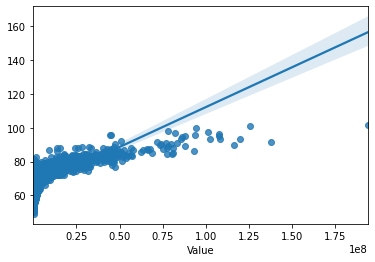

In [97]:
ax = sns.regplot(x = X_train['Value'], y= y_predict_lr, data = ddd)
ax.figure.savefig('linear_regression.png')

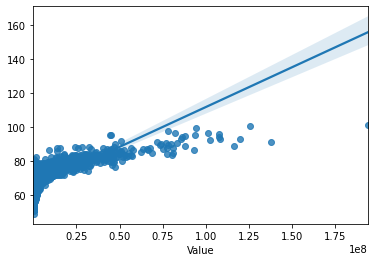

In [91]:
ax = sns.regplot(x = X_train['Value'], y= y_predict_lasso, data = ddd)
ax.figure.savefig('lasso_regression.png')

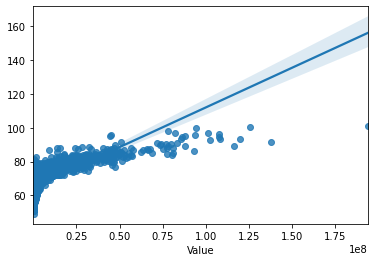

In [92]:
ax = sns.regplot(x = X_train['Value'], y= y_predict_ridge, data = ddd)
ax.figure.savefig('ridge_regression.png')